<a href="https://colab.research.google.com/github/Arch0/bike-sharing/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Arch0/bike-sharing/main/SeoulBikeData.csv", encoding='unicode_escape', date_parser='Date')

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
print('The DataFrame contains {} lines and {} columns'.format(df.shape[0],df.shape[1]))

The DataFrame contains 8760 lines and 14 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.shape

(8760, 14)

In [ ]:





df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# checking missing values
df.isnull().sum()



Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There is no missing value in dataset

In [ ]:
# Datatype of Date is object, need to change in date formate
df['Date']=pd.to_datetime(df['Date'],format="%d/%m/%Y")

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Creating day and night variable

In [ ]:

df["label_day_night"]=df["Hour"].apply(lambda x: 'Night' if(x>20 or x< 5) else ('Day'))

df["label_day_night"].value_counts()

Day      5840
Night    2920
Name: label_day_night, dtype: int64

creating weekday features

In [ ]:
df['WeekDay']=df["Date"].dt.day_name()

creating month feature

In [ ]:
df["Month"]=df["Date"].dt.month_name()
df["year"]=df["Date"].dt.year

In [ ]:

df["Seasons"].value_counts()

Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
df["Holiday"].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
df["Functioning Day"].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [ ]:
# dropping unneccesary column
df=df.drop(["Solar Radiation (MJ/m2)"], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Rainfall(mm)               8760 non-null   float64       
 9   Snowfall (cm)              8760 non-null   float64       
 10  Seasons                    8760 non-null   object        
 11  Holiday                    8760 non-null   object        
 12  Functi

In [ ]:
#sns.pairplot(df)

[Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday'),
 Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday')]

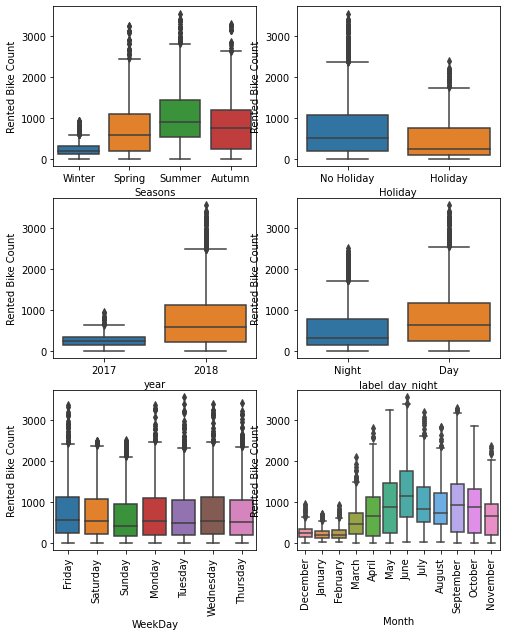

In [ ]:
# visualizing categorical variable
plt.figure(figsize=(8, 10))
plt.subplot(3,2,1)
sns.boxplot(x = 'Seasons', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,2)
sns.boxplot(x = 'Holiday', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,3)
sns.boxplot(x = 'year', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,4)
sns.boxplot(x = 'label_day_night', y = 'Rented Bike Count', data = df)

plt.subplot(3,2,5)
g=sns.boxplot(x = 'WeekDay', y = 'Rented Bike Count', data = df)
plt.subplot(3,2,6)

ax=sns.boxplot(x = 'Month', y = 'Rented Bike Count', data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

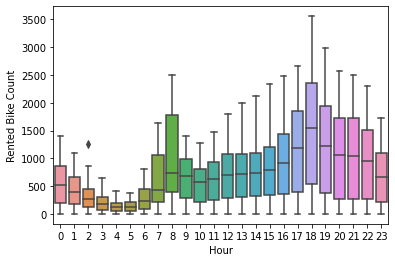

In [ ]:
sns.boxplot(x = 'Hour', y = 'Rented Bike Count', data = df)

In [ ]:
df_Seasons=pd.DataFrame(df.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending=False))
df_Seasons.style.background_gradient(cmap=sns.light_palette("orange", as_cmap=True))

,Rented Bike Count
Seasons,
Summer,2283234
Autumn,1790002
Spring,1611909
Winter,487169


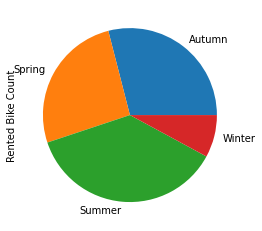

In [ ]:

df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()

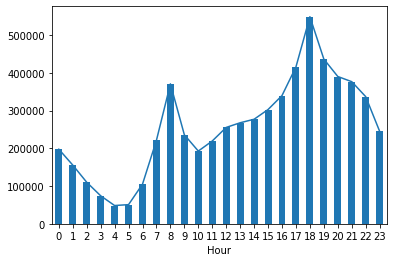

In [ ]:
df.groupby('Hour').sum()['Rented Bike Count'].plot.bar()
df.groupby('Hour').sum()['Rented Bike Count'].plot()

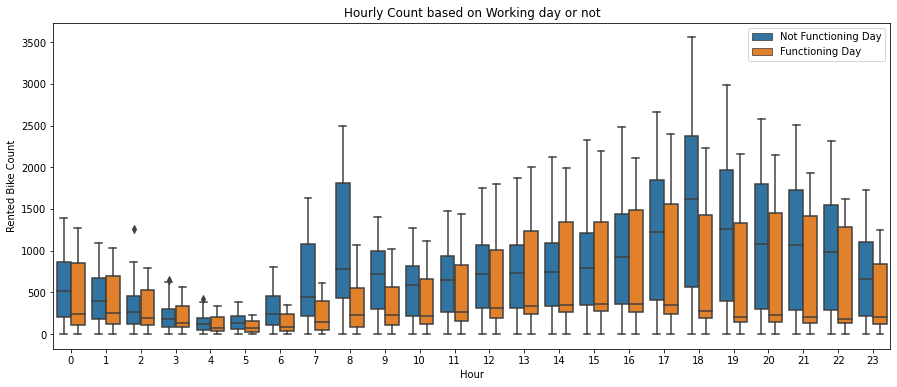

In [ ]:
# seaborn boxplots across hours
f, axes = plt.subplots(1, 1, figsize=(15, 6))
sns.boxplot(data=df, y='Rented Bike Count', x='Hour', hue='Holiday', ax=axes)
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not Functioning Day', 'Functioning Day'])
axes.set(title='Hourly Count based on Working day or not')

plt.show()

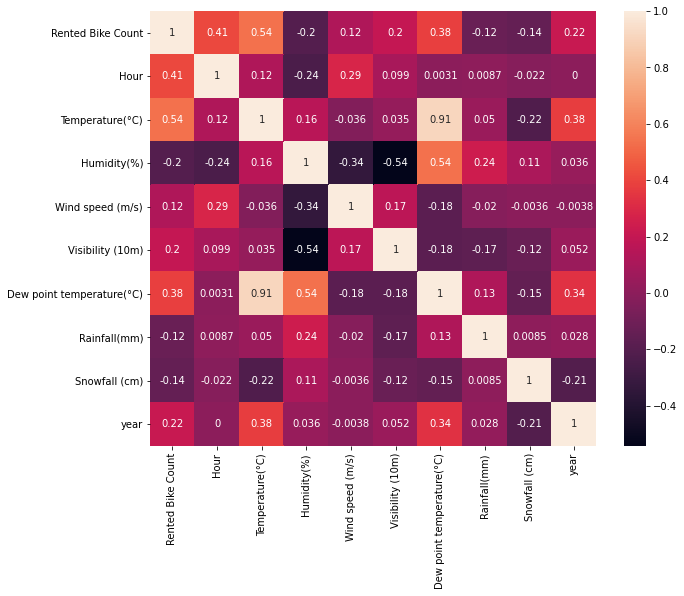

In [ ]:
# checking correlation
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
df=df.drop(["Dew point temperature(°C)"], axis=1)

In [ ]:
df1Corr=pd.DataFrame(df.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Correlation value to the target'])
df1Corr.style.background_gradient(cmap=sns.light_palette("green", as_cmap=True))

,Correlation value to the target
Rented Bike Count,1.000000
Temperature(°C),0.538558
Hour,0.410257
year,0.215162
Visibility (10m),0.199280
Wind speed (m/s),0.121108
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804
Humidity(%),-0.199780


In [ ]:
# Create dummy variables for the catgeorical variable State
status = pd.get_dummies(df['Seasons'], drop_first=True)
status1 = pd.get_dummies(df['Holiday'], drop_first=True)
status2 = pd.get_dummies(df['Functioning Day'], drop_first=True)
status3 = pd.get_dummies(df['WeekDay'], drop_first=True)
status4 = pd.get_dummies(df['Month'], drop_first=True)
status5 = pd.get_dummies(df['label_day_night'], drop_first=True)

In [ ]:
df1=pd.concat([df,status,status1, status2, status3, status4, status5], axis =1)

In [ ]:
# Drop the original column State from the dataframe
df1=df.drop(["Holiday","Seasons","Functioning Day", "WeekDay","Month", "label_day_night",'Date'], axis=1, inplace=True)

In [ ]:
df1=df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented Bike Count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature(°C)    8760 non-null   float64
 3   Humidity(%)        8760 non-null   int64  
 4   Wind speed (m/s)   8760 non-null   float64
 5   Visibility (10m)   8760 non-null   int64  
 6   Rainfall(mm)       8760 non-null   float64
 7   Snowfall (cm)      8760 non-null   float64
 8   year               8760 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 616.1 KB


In [ ]:
dependent_variable = 'Rented Bike Count'

In [ ]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['Wind speed (m/s)',
 'Hour',
 'Temperature(°C)',
 'Snowfall (cm)',
 'Visibility (10m)',
 'Humidity(%)',
 'Rainfall(mm)',
 'year']

In [ ]:
# Create the data of independent variables
X = df[independent_variables].values


In [ ]:
# Create the dependent variable data
y = df[dependent_variable].values

In [ ]:
df[independent_variables]

,Wind speed (m/s),Hour,Temperature(°C),Snowfall (cm),Visibility (10m),Humidity(%),Rainfall(mm),year
0,2.2,0,-5.2,0.0,2000,37,0.0,2017
1,0.8,1,-5.5,0.0,2000,38,0.0,2017
2,1.0,2,-6.0,0.0,2000,39,0.0,2017
3,0.9,3,-6.2,0.0,2000,40,0.0,2017
4,2.3,4,-6.0,0.0,2000,36,0.0,2017
...,...,...,...,...,...,...,...,...
8755,2.6,19,4.2,0.0,1894,34,0.0,2018
8756,2.3,20,3.4,0.0,2000,37,0.0,2018
8757,0.3,21,2.6,0.0,1968,39,0.0,2018
8758,1.0,22,2.1,0.0,1859,41,0.0,2018


Splitting the Data into Training and Testing Sets


In [ ]:
from sklearn.model_selection import train_test_split


np.random.seed(0)
X_train,y_train, X_test,y_test = train_test_split(X,y, test_size = 0.3, random_state = 100)


In [ ]:
num_vars = ['Temperature(°C)', 'Hour', 'Humidity(%)',"Wind speed (m/s)","Visibility (10m)","Rainfall(mm)","Snowfall (cm)"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Rainfall(mm),Snowfall (cm),year,Spring,Summer,Winter,No Holiday,Yes,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,August,December,February,January,July,June,March,May,November,October,September,Night
5584,0.695652,0.955986,0.306122,0.378378,0.876330,0.0,0.0,2018,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5308,0.173913,0.670775,0.989796,0.067568,0.994425,0.0,0.0,2018,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
5446,0.956522,0.792254,0.785714,0.121622,0.887481,0.0,0.0,2018,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
7554,0.782609,0.521127,0.408163,0.324324,0.926001,0.0,0.0,2018,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3290,0.086957,0.455986,0.459184,0.121622,0.993411,0.0,0.0,2018,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


## rescaling 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:

y_train = df_train
X_train = df_train.drop('Hour', axis=1)

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [ ]:
y_train = df_train.pop('Rented Bike Count')
X_train = df_train

In [ ]:

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
col = X_train.columns[rfe.support_]
col

In [ ]:
X_train.columns[~rfe.support_]

Building model using statmodel

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [ ]:
print(lm.summary())

In [ ]:
X_train_new = X_train_rfe.drop(['Rainfall(mm)'], axis=1)

In [ ]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

In [ ]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new = X_train_new.drop(["Yes"],axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_new = X_train_new.drop(['Temperature(°C)'], axis=1)

In [ ]:

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()  
print(lm.summary())

Residual Analysis

In [ ]:
y_train_cnt = lm.predict(X_train_lm)

In [ ]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Making predictions


In [ ]:

num_vars = ['Temperature(°C)', 'Hour', 'Humidity(%)', 'Rented Bike Count',"Wind speed (m/s)","Visibility (10m)","Rainfall(mm)","Snowfall (cm)"]


df_test[num_vars] = scaler.transform(df_test[num_vars])


In [ ]:
y_test = df_test.pop('Rented Bike Count')
X_test = df_test

In [ ]:
# using model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions
from sklearn.metrics import r2_score
y_pred = lm.predict(X_test_new)
round(100*(r2_score(y_test,y_pred)))

Model evaluation

In [ ]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)          

In [ ]:
df.info()

# Decision Tree

In [ ]:

from sklearn.tree import DecisionTreeRegressor

In [ ]:
scalerTrain = preprocessing.StandardScaler().fit(X_train)
scalerTest = preprocessing.StandardScaler().fit(X_test)
X_train_Scaled=scalerTrain.transform(X_train)
X_test_Scaled=scalerTest.transform(X_test)